<a href="https://colab.research.google.com/github/gibi177/CIS--PS/blob/main/Modulo%201/Atividade%20Classificacao/Atividade_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade de Classificação

## Felipe Gibin

### 1. Análise inicial dos dados

O objetivo dessa atividade é construir um modelo de classificação binária para prever se a renda anual de um indivíduo excede US$ 50.000. Usamos o dataset "Adult Census Income", disponivel em https://www.kaggle.com/datasets/uciml/adult-census-income/data

#### 1.1 Carrega o dataset

In [35]:
import pandas as pd

#Carregar o dataset, que usa ; como delimitador
df = pd.read_csv('adult.csv')

#Visualizar primeiras linhas
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### 1.2 Trata valores faltantes

In [36]:
#Soma os valores zero e NaN por coluna
NaN_values = df.isna().sum()

Zero_values = (df == 0).sum()

# Mostrar resultado
print("Contagem NaN por coluna:")
print(NaN_values)

print("\nContagem zeros por coluna:")
print(Zero_values)

Contagem NaN por coluna:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Contagem zeros por coluna:
age                   0
workclass             0
fnlwgt                0
education             0
education.num         0
marital.status        0
occupation            0
relationship          0
race                  0
sex                   0
capital.gain      29849
capital.loss      31042
hours.per.week        0
native.country        0
income                0
dtype: int64


In [37]:
#Checa se todos os valores são nulos
print(df['capital.loss'].value_counts().sort_index())
print(df['capital.gain'].value_counts().sort_index())

capital.loss
0       31042
155         1
213         4
323         3
419         3
        ...  
3004        2
3683        2
3770        2
3900        2
4356        3
Name: count, Length: 92, dtype: int64
capital.gain
0        29849
114          6
401          2
594         34
914          8
         ...  
25236       11
27828       34
34095        5
41310        2
99999      159
Name: count, Length: 119, dtype: int64


In [38]:
#Trata entradas do tipo '?'
df = df.replace('?', pd.NA)
df = df.dropna() #remove linhas com NaN

Observamos que há uma grande quantidade de valores nulos para capital.gain e capital.loss, porém nem todos são de fato nulos. Visto que essas features se referem ao lucro/prejuízo obtido com a venda de ativos, não é necessário tratar esses valores nulos. Ganhos e perdas de capital nulos são completamente normais para a maioria das pessoas.

#### 1.3 Trata outliers

Vamos abster de remover os outliers de capital.gain e capital.loss. Devido ao numero majoritário de valores nulos, todos os valores não nulos seriam considerados outliers caso aplicásse-mos a regra dos (5-95%).

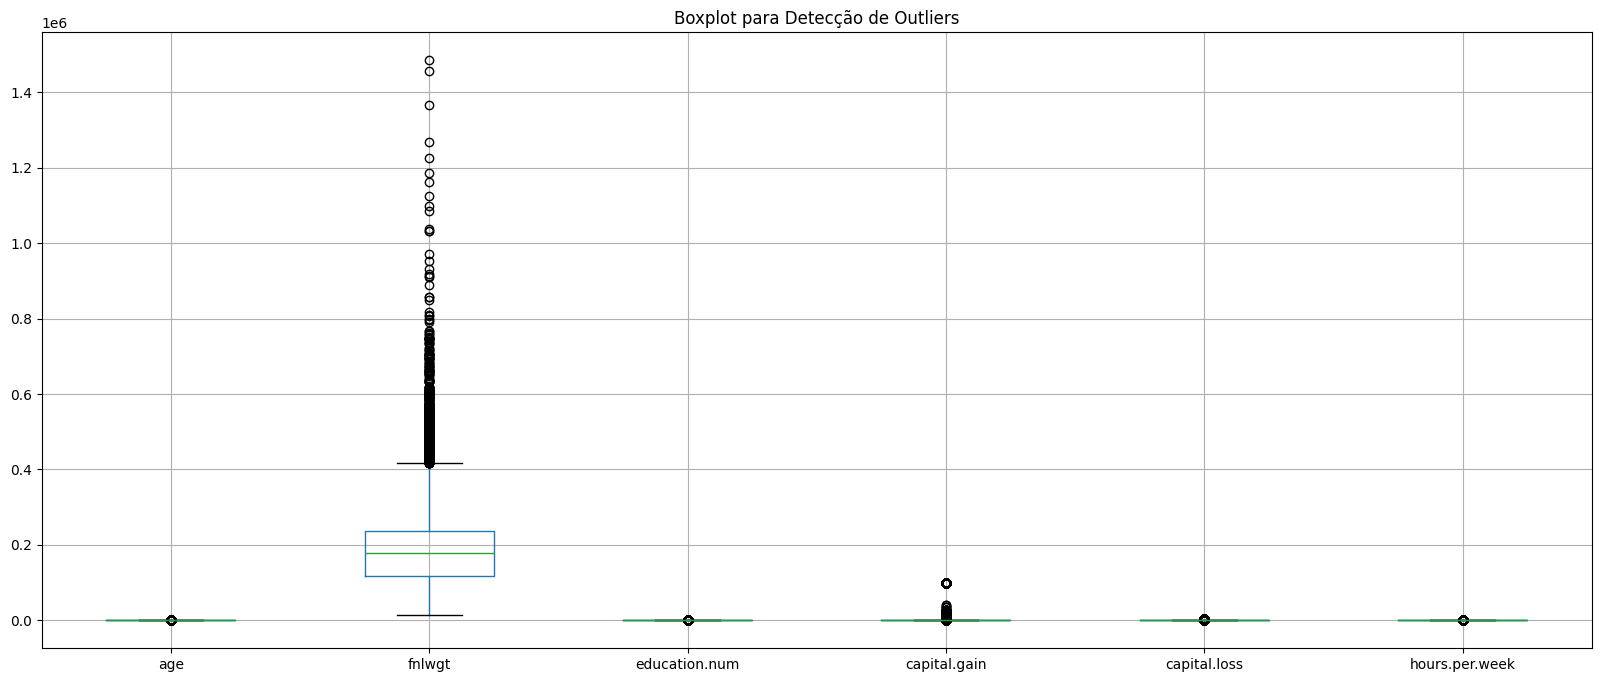

In [39]:
import matplotlib.pyplot as plt

# Boxplot geral para identificação de outliers (colunas com dados numericos)
plt.figure(figsize=(20, 8))
df.boxplot()
plt.title("Boxplot para Detecção de Outliers")
plt.show()

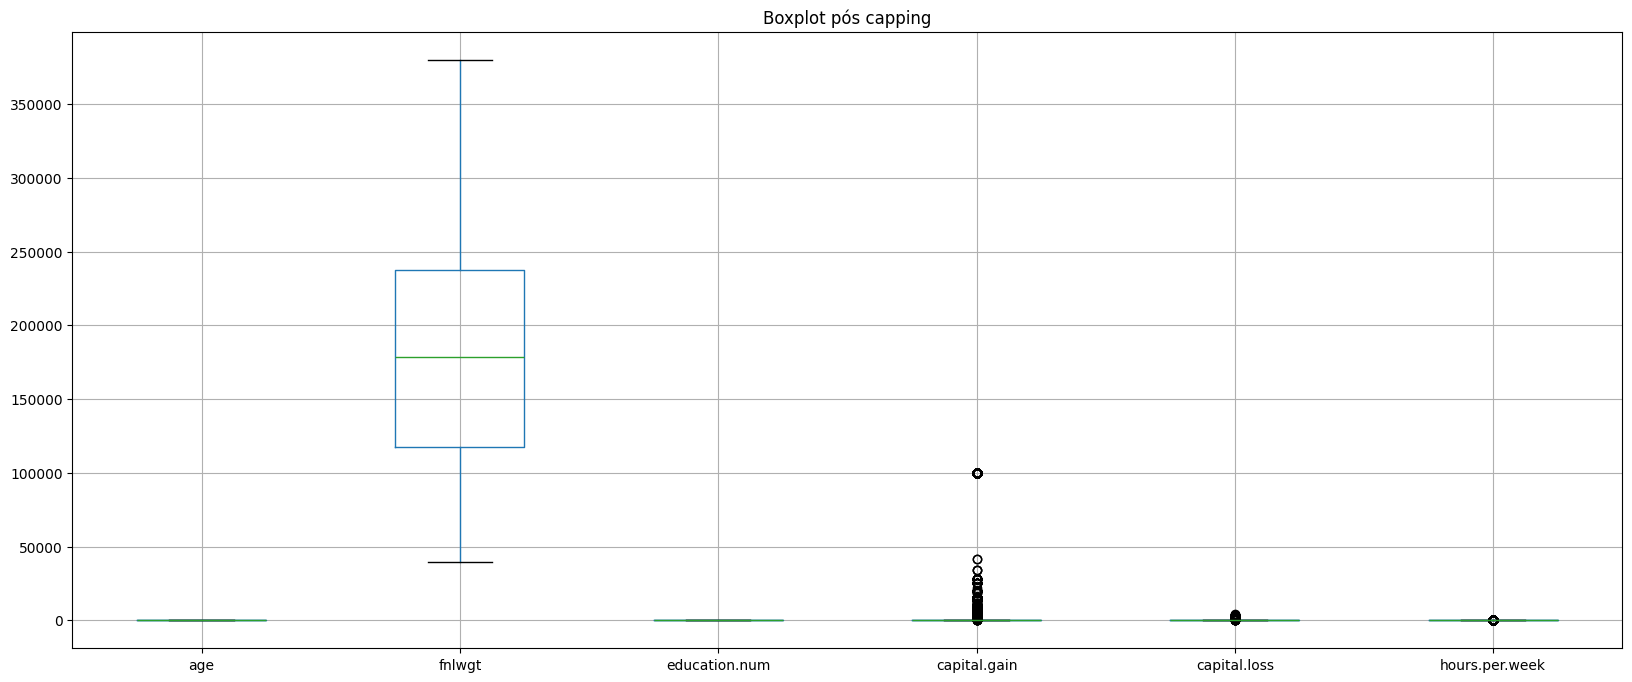

In [40]:
import numpy as np

#funcao de capping (5-95%)
def cap_outliers(data, column):
    lower = data[column].quantile(0.05)
    upper = data[column].quantile(0.95)
    data[column] = np.clip(data[column], lower, upper)

#Aplica o capping às colunas com dados numéricos, com exceção a capital.loss e capital.gain
applicable_cols = df.select_dtypes(include=['number']).columns
applicable_cols = [col for col in applicable_cols if col not in ['capital.gain', 'capital.loss']]
for col in applicable_cols:
    cap_outliers(df, col)

#Novo boxplot, apos o capping
plt.figure(figsize=(20, 8))
df.boxplot()
plt.title("Boxplot pós capping")
plt.show()

#### 1.4 Substitui coluna income por variável numérica binária

Substituiremos valores da coluna 'income', atualmente no formato <=50k e >50k por uma variável numérica binária (0 e 1 respectivamente)

In [41]:
# Convertendo a coluna 'income' para valores binários (0 e 1)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Verificando os primeiros valores para garantir a transformação
print(df['income'].head())

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64


#### 2. Análise exploratória dos dados (atv opcional)

#### 2.1 Distribuição dos dados numéricos

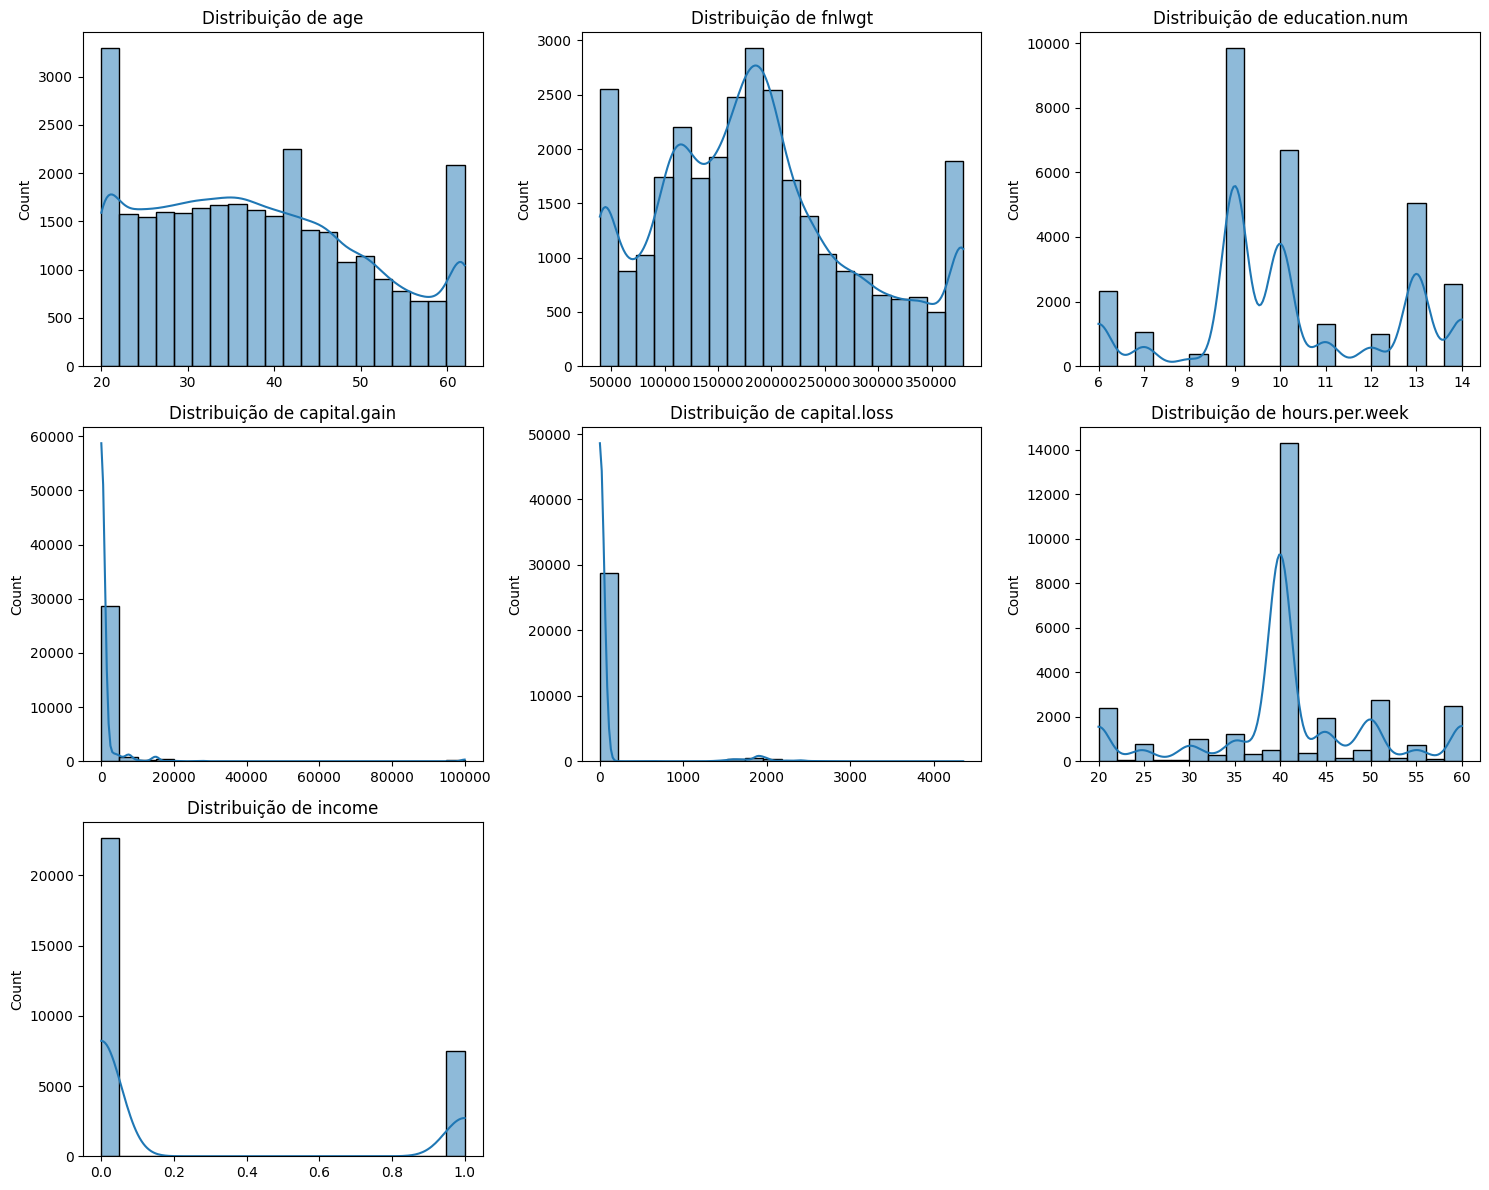

In [42]:
import seaborn as sns

#Colunas dos dados numéricos
numeric_data = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 12))

# Histogramas com curvas de densidade
for i, var in enumerate(numeric_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f'Distribuição de {var}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

#### 2.2 Distribuição dos dados categóricos

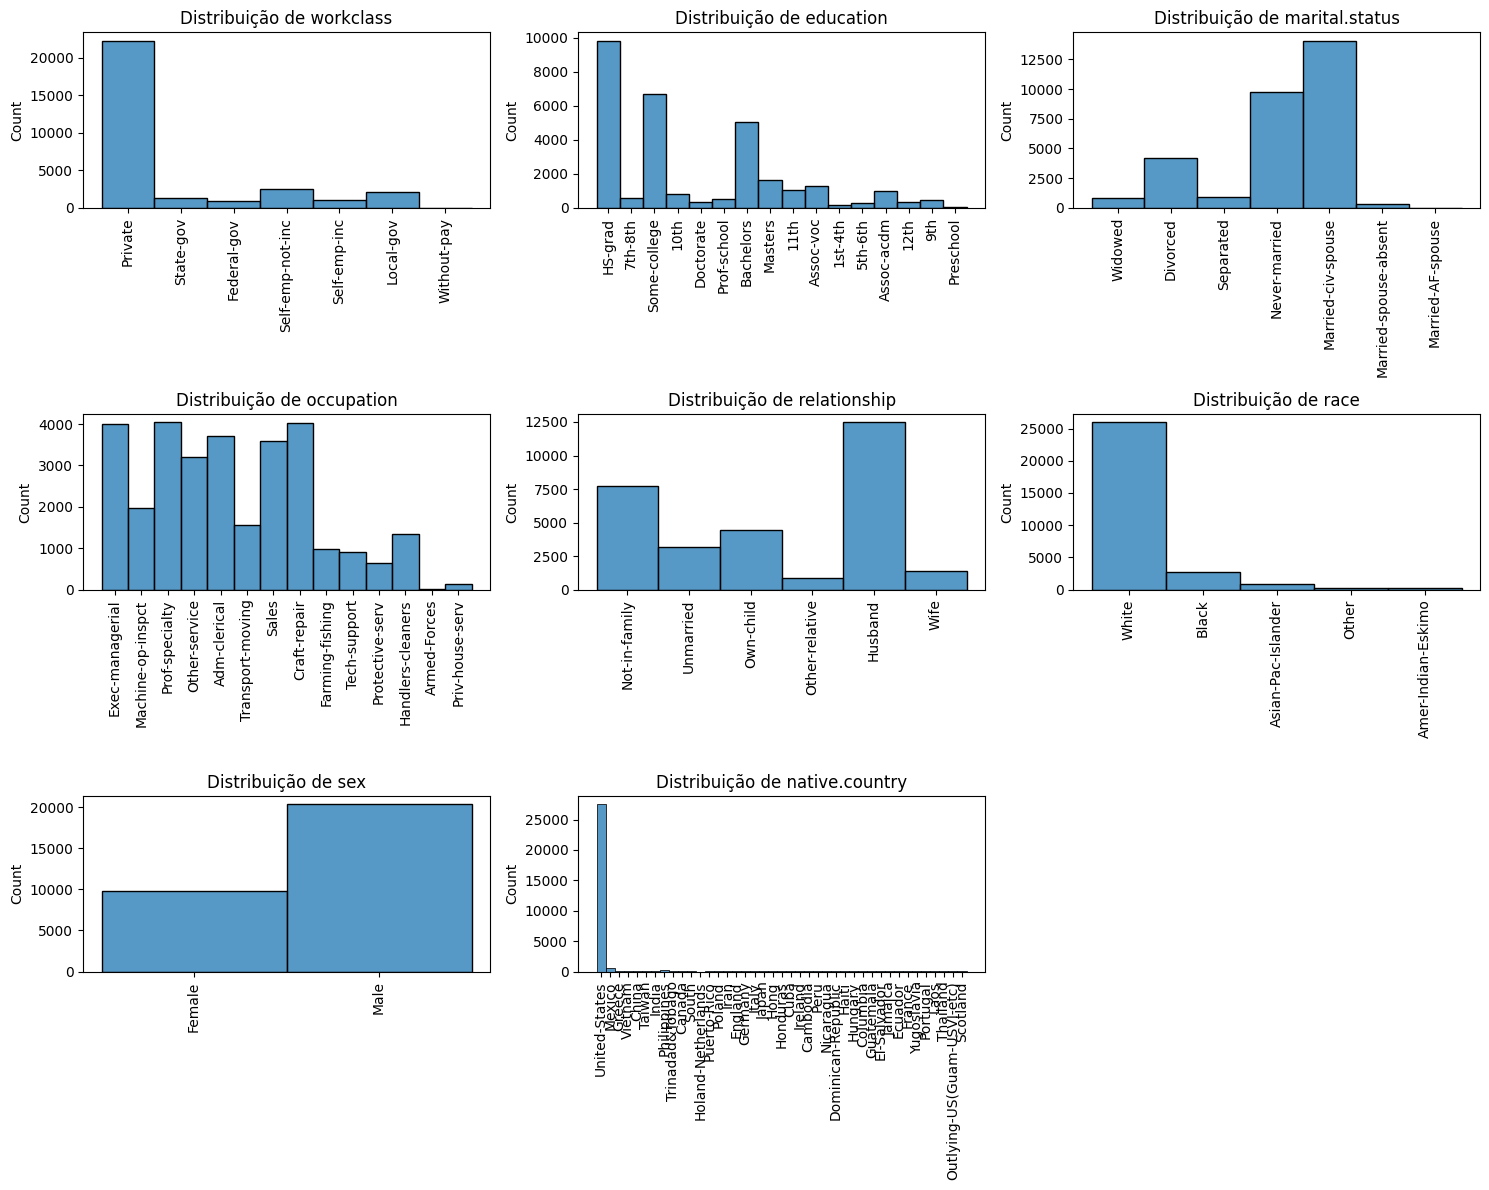

In [43]:
#Colunas dos dados categóricos
categoric_data = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 12))

# Histogramas com curvas de densidade
for i, var in enumerate(categoric_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=False, discrete=True)  # `discrete=True` é mais apropriado para categóricos
    plt.title(f'Distribuição de {var}')
    plt.xlabel('')
    plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X (legibilidade)

plt.tight_layout()
plt.show()

#### 2.3 Investigando correlações

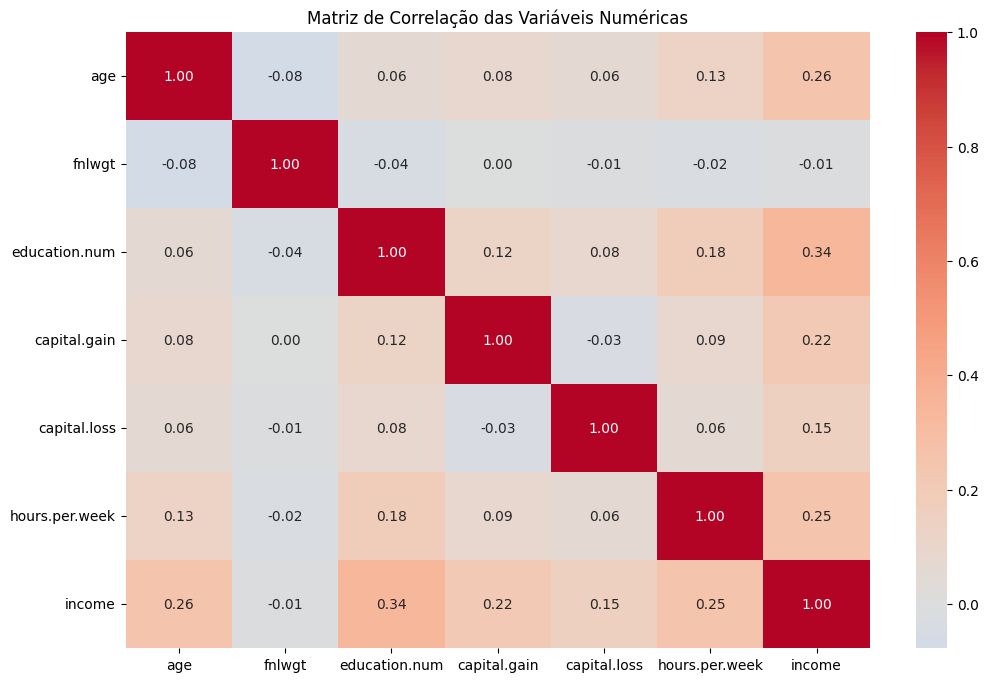

In [44]:
# Calcular a matriz de correlação
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

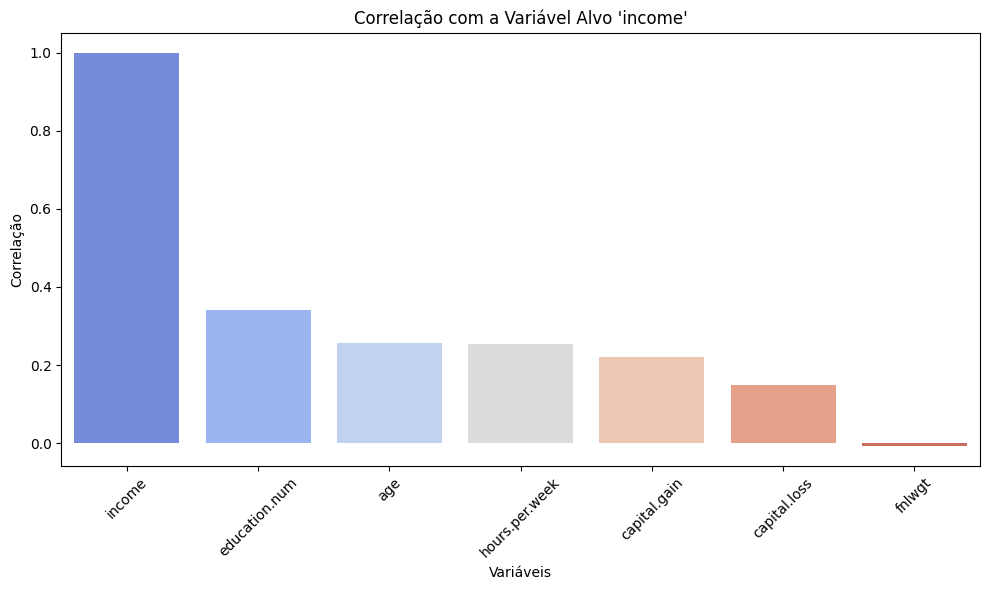

In [45]:
# Correlação da variável alvo com todas as outras
correlations = correlation_matrix['income'].sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, hue=correlations.index, palette='coolwarm', legend=False)
plt.title("Correlação com a Variável Alvo 'income'")
plt.xticks(rotation=45)
plt.xlabel("Variáveis")
plt.ylabel("Correlação")
plt.tight_layout()
plt.show()

Observamos que, de forma geral, não há correlação forte entre as variáveis, embora haja uma correlação 'moderada positiva' entre education.num e age com a variável alvo income.

#### 2.4 Influência de education e occupation

In [46]:
categorical_cols = ['education', 'occupation']

for col in categorical_cols:
    print(f"\nProporção de pessoas com >50K por categoria de {col}:\n")
    print(df.groupby(col)['income'].mean().sort_values(ascending=False))


Proporção de pessoas com >50K por categoria de education:

education
Prof-school     0.749077
Doctorate       0.746667
Masters         0.564229
Bachelors       0.421491
Assoc-voc       0.263198
Assoc-acdm      0.253968
Some-college    0.200060
HS-grad         0.164329
12th            0.076923
10th            0.071951
7th-8th         0.062837
11th            0.056298
9th             0.054945
5th-6th         0.041667
1st-4th         0.039735
Preschool       0.000000
Name: income, dtype: float64

Proporção de pessoas com >50K por categoria de occupation:

occupation
Exec-managerial      0.485220
Prof-specialty       0.448489
Protective-serv      0.326087
Tech-support         0.304825
Sales                0.270647
Craft-repair         0.225310
Transport-moving     0.202926
Adm-clerical         0.133835
Machine-op-inspct    0.124619
Farming-fishing      0.116279
Armed-Forces         0.111111
Handlers-cleaners    0.061481
Other-service        0.041096
Priv-house-serv      0.006993
Name: inc

Observamos uma relação relevante entre education e income, em que indivíduos com nível superior e acima compõem proporção significativa de pessoas com renda maior que 50K. Além disso, profissões como Exec-managerial e Prof-specialty também apresentam uma proporção considerável de pessoas com renda >50K. Ambas as descobertas condizem com o esperado.

### 3. Comparação de Modelos (atv obrigatoria)

Vamos definir e treinar 2 modelos: Árvore de decisão e Random forest.

#### 3.1 Split dos dados, Codificação e normalização de variáveis (atv opcional)

Antes de começarmos de fato, será feita a codificação das variáveis categóricas com o one hot encoding. Além disso, faremos a normalização das variáveis, que manterá as variáveis 'dummies' inalteradas e transformara os dados para média 0 e desvio padrão 1

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Codificar variáveis categóricas com One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar X e y
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar apenas os dados de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 3.2 Definição dos modelos

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o arvore de decisao
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5,random_state=42, class_weight='balanced')
tree_model.fit(X_train, y_train)

# Predição
y_pred_tree = tree_model.predict(X_test)

# Criar e treinar o modelo random forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=4, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predição
y_pred_rf = rf_model.predict(X_test)

#### 3.3 Checando se há overfitting

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Previsões no conjunto de treino
y_train_pred_tree = tree_model.predict(X_train)
y_train_pred_rf = rf_model.predict(X_train)

# Árvore de decisão
print("Árvore de Decisão - Treino:")
print("Acurácia:", accuracy_score(y_train, y_train_pred_tree))
print(classification_report(y_train, y_train_pred_tree))

# Random Forest
print("\nRandom Forest - Treino:")
print("Acurácia:", accuracy_score(y_train, y_train_pred_rf))
print(classification_report(y_train, y_train_pred_rf))

Árvore de Decisão - Treino:
Acurácia: 0.7820879439678395
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     18121
           1       0.54      0.89      0.67      6008

    accuracy                           0.78     24129
   macro avg       0.75      0.82      0.75     24129
weighted avg       0.85      0.78      0.80     24129


Random Forest - Treino:
Acurácia: 0.7784408802685565
              precision    recall  f1-score   support

           0       0.96      0.74      0.83     18121
           1       0.53      0.90      0.67      6008

    accuracy                           0.78     24129
   macro avg       0.74      0.82      0.75     24129
weighted avg       0.85      0.78      0.79     24129



Observamos que as métricas estão mais bem distribuídas, indicando uma amenização do overfitting, após várias mudanças de parâmetros no modelo.

#### 3.5 Avaliação

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Metricas arvore de decisão
print("Métricas associadas à árvore de decisão:")

acuracia_tree = accuracy_score(y_test, y_pred_tree)
print(f"Acurácia: {acuracia_tree:.2%}")
print(classification_report(y_test, y_pred_tree))


#Metricas random forest
print("\nMétricas associadas ao random forest:")

acuracia_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia: {acuracia_rf:.2%}")
print(classification_report(y_test, y_pred_rf))

Métricas associadas à árvore de decisão:
Acurácia: 77.08%
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      4533
           1       0.52      0.86      0.65      1500

    accuracy                           0.77      6033
   macro avg       0.73      0.80      0.74      6033
weighted avg       0.84      0.77      0.79      6033


Métricas associadas ao random forest:
Acurácia: 76.79%
              precision    recall  f1-score   support

           0       0.95      0.73      0.83      4533
           1       0.52      0.89      0.66      1500

    accuracy                           0.77      6033
   macro avg       0.74      0.81      0.74      6033
weighted avg       0.84      0.77      0.78      6033



OBS: Obsevamos que há uma desproporcionalidade entre precisão e recall no nosso modelo. Adicionei o parâmetro class_weight='balanced' em ambos os modelos a fim de aumentar os pesos que a classe minoritária tem na função de perda. Por consequência, o recall aumentou substancialmente e, pelo trade-off entre recall e precisão, observei uma queda forte na precisão. Cabe uma análise: é mais interessante evitar falsos negativos (recall alto) ou evitar falsos positivos (precisão alta)? Essa decisão contribui para o uso, ou não, do parâmetro citado.

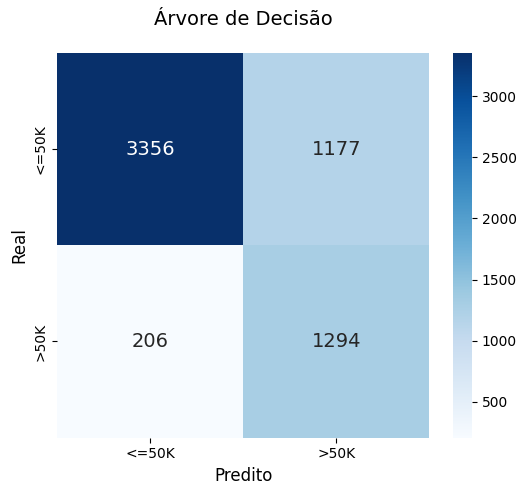

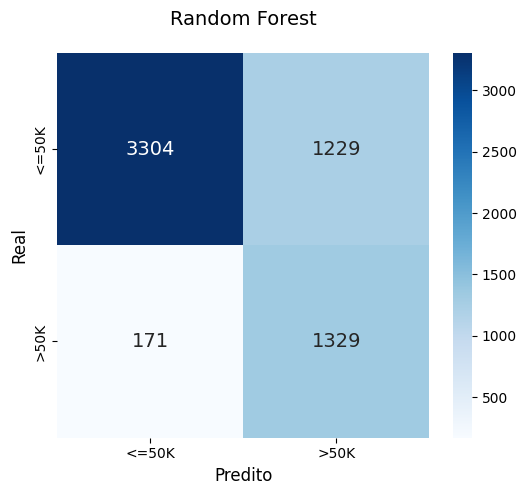

In [51]:
#Matriz de confusão
def plot_confusion_matrix(model, X_test, y_test, class_names=['<=50K', '>50K'],title='Matriz de Confusão'):
    # Fazer previsões
    y_pred = model.predict(X_test)

    # Gerar matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Plotar a matriz de confusão com o heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names,
                annot_kws={'size': 14},)

    # Adicionar rótulos e título
    plt.xlabel('Predito', fontsize=12)
    plt.ylabel('Real', fontsize=12)
    plt.title(title, pad=20, fontsize=14)

    # Ajustar o layout e mostrar o gráfico
    plt.show()

# Matriz da arvore de decisao
plot_confusion_matrix(tree_model, X_test, y_test,title='Árvore de Decisão')

# Matriz do random forest
plot_confusion_matrix(rf_model, X_test, y_test,title='Random Forest')

#### 3.6 Conclusões acerca das métricas

Observamos que tanto a Árvore de Decisão quanto o Random Forest apresentaram desempenhos muito parecidos, com acurácias de 77,08% e 76,79%, respectivamente. Apesar da acurácia um pouco maior da Árvore, o Random Forest se destacou no recall da classe minoritária (>50K), alcançando 0,89 contra 0,86 da Árvore. Isso mostra que o Random Forest conseguiu identificar melhor as pessoas com renda acima de 50K. Por outro lado, essa melhora no recall veio acompanhada de uma queda na precisão, que ficou em 0,52 nos dois modelos, ou seja, eles também erraram bastante ao prever quem realmente ganha mais. No geral, os dois modelos apresentaram um desempenho equilibrado, mas o Random Forest teve uma leve vantagem na identificação da classe minoritária, o que pode ser relevante dependendo dos objetivos do projeto.

#### 3.7 Gráficos de importância

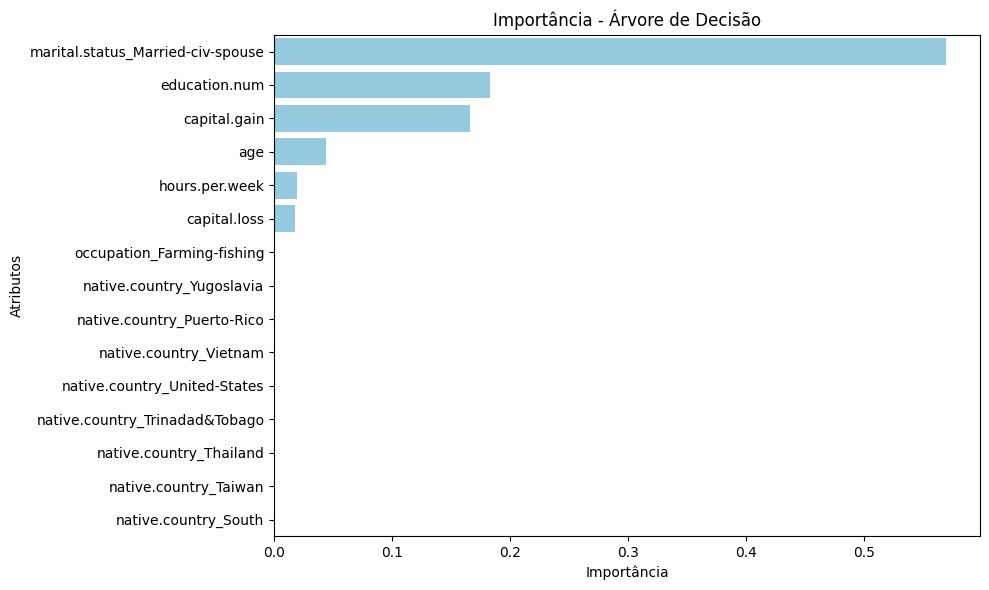

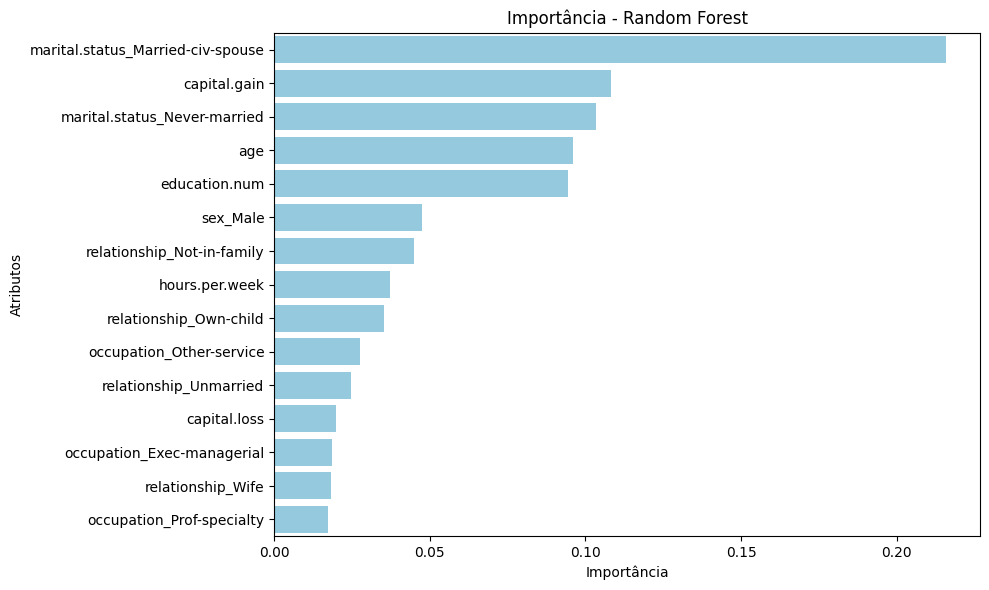

In [52]:
# Gráfico de importância de atributos para cada modelo

def plot_feature_importance(model, feature_names, title='Importância dos Atributos', top_n=15):

    # Obter importâncias
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features_sorted = [feature_names[i] for i in indices]

    # Converter para DataFrame para plot mais flexível
    importance_df = pd.DataFrame({
        'feature': features_sorted,
        'importance': importances[indices]
    })

    # Limitar ao top_n atributos mais importantes
    importance_df = importance_df.head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df, color='skyblue')
    plt.title(title)
    plt.xlabel('Importância')
    plt.ylabel('Atributos')
    plt.tight_layout()
    plt.show()


# Obter nomes das colunas após get_dummies
feature_names = X.columns

# Árvore de Decisão
plot_feature_importance(tree_model, feature_names, title='Importância - Árvore de Decisão')

# Random Forest
plot_feature_importance(rf_model, feature_names, title='Importância - Random Forest')

Nesses gráficos de importância, os valores do eixo X são proporções entre 0 e 1, onde a soma de todas as importâncias dá 1.0. Dessa forma, uma importância de, por exemplo, 0.1, indica que essa feature foi responsável por 10% da tomada de decisão do modelo.

Dito isso, levanta-se a dúvida: por que as importâncias não batem com a matriz de correlação encontrada anteriormente? Essa discrepância ocorre pois cada um mede aspectos diferentes: a correlação avalia relações lineares simples entre uma variável e o alvo, sem considerar o contexto das demais variáveis, enquanto a importância dos atributos reflete o quanto a feature foi responsável pela tomada de decisão do modelo. Assim, uma variável pode ter alta correlação com o alvo, mas baixa importância no modelo se for redundante com outras já usadas.